In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt_1
%matplotlib inline
import glob
import os
from py_vollib.black_scholes.implied_volatility import implied_volatility 


os.chdir(r'C:\Users\s0837263\Desktop\Plots_Robust_SDEs\write_up_plots_bimonthly\Real_data_LV_LSV\V5_OTM_spread')

In [11]:
def get_vanilla_iv():
    
    timesteps_at_mat = range(16,97,16)
    maturities_used = [16/192,32/192,48/192,64/192,80/192,96/192]
    maturities_call = np.load("SPX_call_maturity.npy").T[:6]
    maturities_put = np.load("SPX_put_maturity.npy").T[:6]
    maturities_market = maturities_call
    print('maturities uniform:',maturities_used)
    print('maturities market:',maturities_call)
    
    for idx_mat in range(0,len(timesteps_at_mat),1):
        fig, ax = plt.subplots(1,2)
        K = np.load('SPX_strikes.npy')[:45]/1000
        K_otm_put=K[0:28]
        K_itm_put=K[28:45]
        vanilla_ask_call=np.load("SPX_call_ask.npy").T[:6, :45]/1000
        vanilla_bid_call =np.load("SPX_call_bid.npy").T[:6, :45]/1000
        vanilla_ask_put=np.load("SPX_put_ask.npy").T[:6, :45]/1000
        vanilla_bid_put =np.load("SPX_put_bid.npy").T[:6,:45]/1000 
        put_IV_market = np.load("SPX_put_iv.npy").T[:6,:45]
        call_IV_market = np.load("SPX_call_iv.npy").T[:6,:45]
        iv_ask_call = np.zeros_like(K)
        iv_bid_call = np.zeros_like(K)
        iv_ask_put = np.zeros_like(K)
        iv_bid_put = np.zeros_like(K)
        iv_ask_call_uniform_mat = np.zeros_like(K)
        iv_bid_call_uniform_mat = np.zeros_like(K)
        t_market = maturities_market[idx_mat]
        t_uniform = timesteps_at_mat[idx_mat]
        for idx, (ask, bid, k) in enumerate(zip(vanilla_ask_call[idx_mat,0:45], vanilla_bid_call[idx_mat,0:45], K)):
                  try:
                     iv_ask_call[idx] = implied_volatility(ask,  S=3.221, K=k, r=0.0, t=t_market, flag="c")
                     iv_ask_call_uniform_mat[idx] = implied_volatility(ask,  S=3.221, K=k, r=0.0, t=t_uniform/(2*96), flag="c")   
                  except:
                     pass
                  try:
                     iv_bid_call[idx] = implied_volatility(bid,  S=3.221, K=k, r=0.0, t=t_market, flag="c")
                     iv_bid_call_uniform_mat[idx] = implied_volatility(bid,  S=3.221, K=k, r=0.0, t=t_uniform/(2*96), flag="c")
                  except:
                     pass
                
        for idx, (ask, bid, k) in enumerate(zip(vanilla_ask_put[idx_mat,0:45], vanilla_bid_put[idx_mat,0:45], K)):
                  try:
                     iv_ask_put[idx] = implied_volatility(ask,  S=3.221, K=k, r=0.0, t=t_market, flag="p")
                  except:
                     pass
                  try:
                     iv_bid_put[idx] = implied_volatility(bid,  S=3.221, K=k, r=0.0, t=t_market, flag="p")       
                  except:
                     pass
                
        ax[0].plot(K_itm_put, iv_ask_call[28:45], label="Ask IV Call OTM",color='black',linestyle="None",marker='*')
        ax[0].plot(K_itm_put, iv_bid_call[28:45], label="Bid IV Call OTM",color='black',linestyle="None",marker='+')  
        ax[0].plot(K_otm_put, iv_ask_put[0:28], label="Ask IV Put OTM",color='red',linestyle="None",marker='*')
        ax[0].plot(K_otm_put, iv_bid_put[0:28], label="Bid IV Put OTM",color='red',linestyle="None",marker='+')
        ax[0].plot(K_otm_put, put_IV_market[idx_mat,0:28], label="Market IV Put OTM",color='blue',linestyle="None",marker='d')
        ax[0].plot(K_itm_put, call_IV_market[idx_mat,28:45], label="Market IV Call OTM",color='green',linestyle="None",marker='d')
        ax[1].plot(K,iv_ask_call_uniform_mat, label="Ask IV Call",color='black',linestyle="None",marker='*' )
        ax[1].plot(K,iv_bid_call_uniform_mat, label="Bid IV Call",color='black',linestyle="None",marker='+' )
        ax[1].plot(K, call_IV_market[idx_mat,:], label="Market IV Call",color='green',linestyle="None",marker='d')
                           
        ax[0].legend()
        ax[1].legend()
        ax[0].set_ylabel("Implied Vol.")
        ax[0].set_xlabel("K")
        ax[1].set_xlabel("K")
        plt.suptitle("Month: T={}".format(t_uniform//16))
        ax[0].set_title("Market Maturities")
        ax[1].set_title("Uniform Maturities")
        fig.savefig('Mat_'+str(t_uniform//16)+'_iv.pdf', format='pdf')
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])


# Market Implied Vol. with IV spread (based on bid/ask prices and r=q=0)

maturities uniform: [0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.4166666666666667, 0.5]
maturities market: [0.07671233 0.17260274 0.24931507 0.3260274  0.40273973 0.49863014]


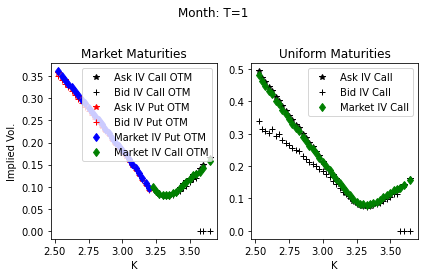

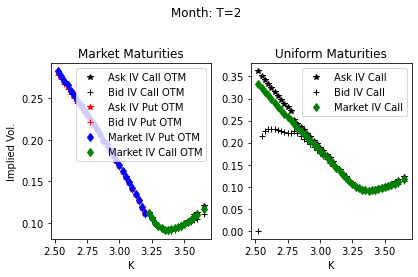

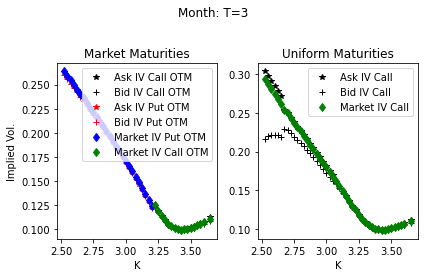

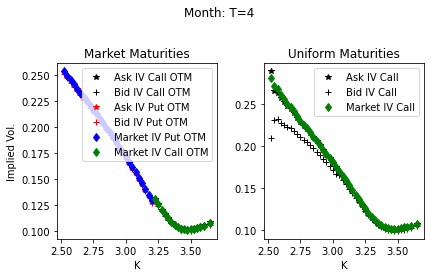

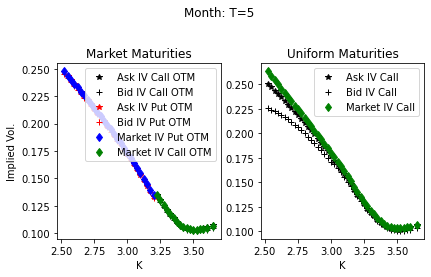

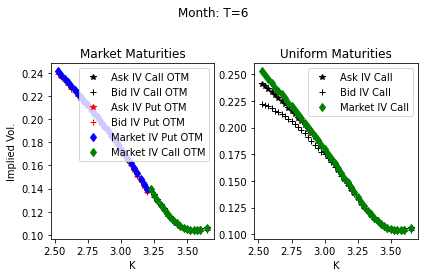

In [12]:
get_vanilla_iv()